In [6]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import os
import random
import torch
import torch.nn as nn
from custommodels import LoadDataset, ResNet50, DenseNet121, MobileNetV2
from training import ModelTrainer

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
# to reproduce
seed = 42
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True

In [8]:
db = "HAM"
root = f"../../dataset/CAI 2025/{db}/"
df_train = pd.read_csv(f"{root}/dataframe/df_distance_train.csv")
df_valid = pd.read_csv(f"{root}/dataframe/df_distance_valid.csv")
df_test = pd.read_csv(f"{root}/dataframe/df_distance_test.csv")

loader = LoadDataset(label="label", batch_size=8)
train_loader, valid_loader, test_loader = loader.create_dataloaders(df_train, df_valid, df_test)

Width: 200 Height: 150


# ResNet

In [9]:
models = ["RES", "DENSE", "MOBILE"]

model_save_directory = f"{root}models/{models[0]}/"
if not os.path.exists(model_save_directory):
    os.makedirs(model_save_directory)
    print(f"{model_save_directory} created.")
else:
    print(f"{model_save_directory} aready exist.")

df_valid_filepath = f"{root}eval/df_valid_{models[0]}.csv"
df_test_filepath = f"{root}eval/df_test_{models[0]}.csv"

../../dataset/CAI 2025/HAM/models/RES/ aready exist.


Validation Accuracy: 0.4401 | Loss: 1.0685 | F1: 0.4092
Validation Accuracy: 0.5873 | Loss: 0.9884 | F1: 0.5754
Validation Accuracy: 0.6222 | Loss: 0.8867 | F1: 0.6095
Validation Accuracy: 0.6495 | Loss: 0.8124 | F1: 0.6428
Validation Accuracy: 0.6525 | Loss: 0.8129 | F1: 0.6355
Validation Accuracy: 0.6904 | Loss: 0.7470 | F1: 0.6849
Validation Accuracy: 0.6753 | Loss: 0.7590 | F1: 0.6693
Validation Accuracy: 0.7011 | Loss: 0.7257 | F1: 0.6958
Validation Accuracy: 0.6920 | Loss: 0.7202 | F1: 0.6838
Validation Accuracy: 0.6616 | Loss: 0.7430 | F1: 0.6526
Validation Accuracy: 0.7086 | Loss: 0.7037 | F1: 0.7046
Validation Accuracy: 0.6995 | Loss: 0.7250 | F1: 0.6873
Validation Accuracy: 0.7147 | Loss: 0.6914 | F1: 0.7103
Validation Accuracy: 0.6920 | Loss: 0.6956 | F1: 0.6871
Validation Accuracy: 0.7102 | Loss: 0.6896 | F1: 0.7029
Validation Accuracy: 0.7071 | Loss: 0.6872 | F1: 0.7017
Validation Accuracy: 0.7086 | Loss: 0.6933 | F1: 0.7055
Validation Accuracy: 0.6798 | Loss: 0.7075 | F1:

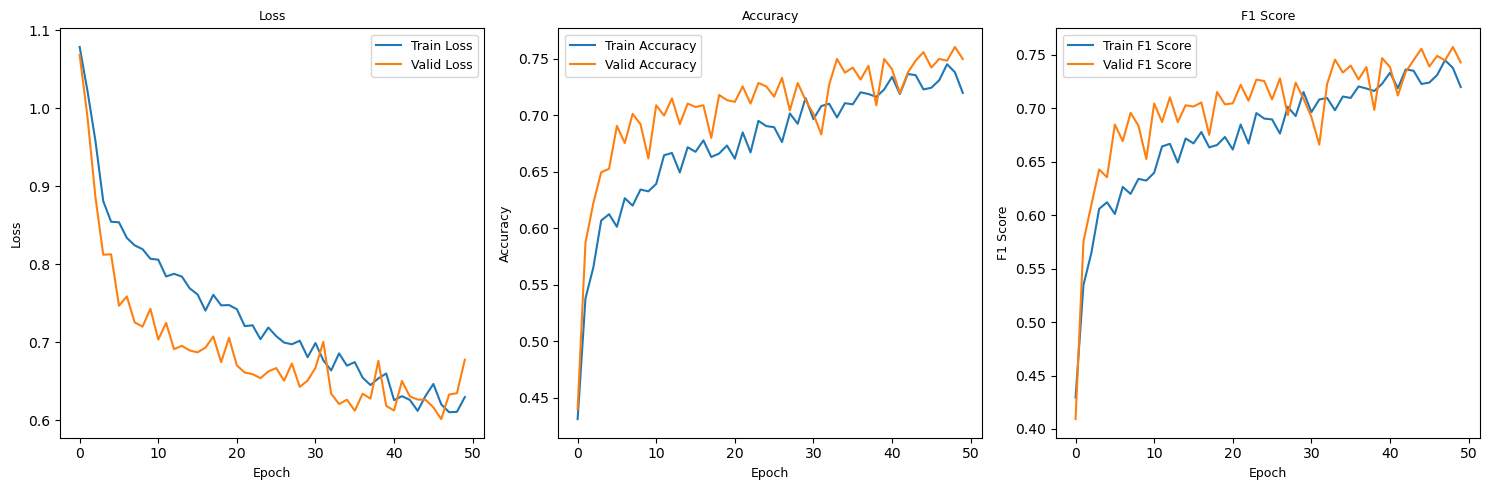

              precision    recall  f1-score   support

           0       0.78      0.80      0.79       219
           1       0.71      0.68      0.70       220
           2       0.76      0.76      0.76       220

    accuracy                           0.75       659
   macro avg       0.75      0.75      0.75       659
weighted avg       0.75      0.75      0.75       659

              precision    recall  f1-score   support

           0       0.79      0.79      0.79       220
           1       0.74      0.72      0.73       219
           2       0.73      0.75      0.74       220

    accuracy                           0.75       659
   macro avg       0.75      0.75      0.75       659
weighted avg       0.75      0.75      0.75       659



In [10]:
num_class = 3
num_epochs = 50
lr = 1e-5

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Training
model = ResNet50(num_class).to(device)
trainer = ModelTrainer()
best_val_file = trainer.train(model, train_loader, valid_loader, model_save_directory, num_epochs=num_epochs, lr=lr)

# Validation
model.load_state_dict(torch.load(best_val_file))
test_predictions, test_outputs = trainer.evaluate(model, valid_loader)
df_valid["pred"] = test_predictions
df_valid["proba"] = test_outputs
df_valid.to_csv(df_valid_filepath, index=False)

# Test
test_predictions, test_outputs = trainer.evaluate(model, test_loader)
df_test["pred"] = test_predictions
df_test["proba"] = test_outputs
df_test.to_csv(df_test_filepath, index=False)